# Testando análise de dados eleitorais

In [1]:
print ("""Ano 2020 - Eleição Municipal \n
Ano 2018 - Eleição Federal e Estadual""")

Ano 2020 - Eleição Municipal 

Ano 2018 - Eleição Federal e Estadual


#### Determinando o ano da eleição que será analisada

In [2]:
eleicao_ano = 2018
print(f"Ano escolhido: {eleicao_ano}")

Ano escolhido: 2018


#### Importando as bibliotecas Pandas e Matplotlib, e fazendo as configurações necessárias

In [3]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

#### Carregando o .csv da eleição de interesse

In [4]:
if eleicao_ano == 2018:
    filename = r'D:\WORK\TestandoJupiter\perfil_eleitorado_2018.csv'
    df = pd.read_csv(filename, 
                 delimiter=';', 
                 encoding='iso-8859-1',
                 error_bad_lines=False)

elif eleicao_ano == 2020:
    filename = r'D:\WORK\TestandoJupiter\perfil_eleitorado_2020.csv'
    df = pd.read_csv(filename, 
                 delimiter=';', 
                 encoding='iso-8859-1',
                 error_bad_lines=False)

else:
    print("Escolha um ano válido")

#### Retorna a dimensão do .csv (linhas, colunas)

In [5]:
df.shape

(4181293, 21)

#### Retorna o nome das variáveis que estão no cabeçalho do .csv

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181293 entries, 0 to 4181292
Data columns (total 21 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   CD_GENERO                   int64 
 10  DS_GENERO                   object
 11  CD_ESTADO_CIVIL             int64 
 12  DS_ESTADO_CIVIL             object
 13  CD_FAIXA_ETARIA             int64 
 14  DS_FAIXA_ETARIA             object
 15  CD_GRAU_ESCOLARIDADE        int64 
 16  DS_GRAU_ESCOLARIDADE        object
 17  QT_ELEITORES_PERFIL         int64 
 18  QT_ELEITORES_BIOMETRIA      int64 
 19  QT_ELEITORES_DEFICIENCIA    int64 
 20  QT

#### Amostra dos dados do .csv

In [7]:
df.sample(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
443638,17/09/2018,23:21:37,2018,PI,11290,MONSENHOR HIPÓLITO,1,Biométrico,28,4,FEMININO,1,SOLTEIRO,1800,18 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,18,18,0,0
3973929,17/09/2018,23:21:37,2018,RS,86487,CANDIOTA,1,Biométrico,142,4,FEMININO,3,CASADO,4549,45 a 49 anos,2,LÊ E ESCREVE,2,2,0,0
4113592,17/09/2018,23:21:37,2018,PR,75094,CLEVELÂNDIA,1,Biométrico,47,2,MASCULINO,1,SOLTEIRO,7074,70 a 74 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,3,3,0,0
3153968,17/09/2018,23:21:37,2018,SP,71030,SÃO MANUEL,0,Sem biometria,129,4,FEMININO,9,DIVORCIADO,3539,35 a 39 anos,6,ENSINO MÉDIO COMPLETO,21,19,0,0
1089119,17/09/2018,23:21:37,2018,PB,22217,SOLÂNEA,1,Biométrico,48,2,MASCULINO,3,CASADO,1900,19 anos,5,ENSINO MÉDIO INCOMPLETO,1,1,0,0


#### Filtrando um subgrupo município

In [8]:
cidade = df.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')

#### Plot Grau de Escolaridade

<AxesSubplot:xlabel='DS_GRAU_ESCOLARIDADE'>

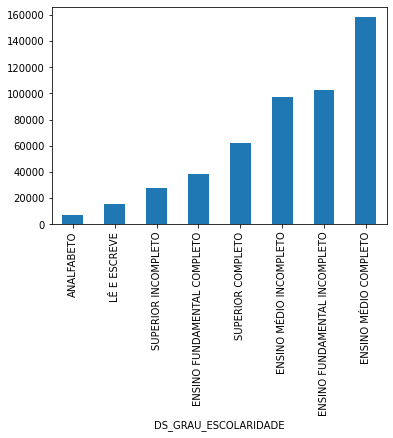

In [9]:
cidade.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum().sort_values().plot(kind='bar')

#### Plot Estado Civil

<AxesSubplot:xlabel='DS_ESTADO_CIVIL'>

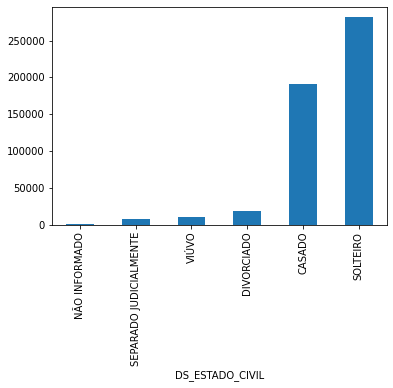

In [10]:
cidade.groupby('DS_ESTADO_CIVIL')['QT_ELEITORES_PERFIL'].sum().sort_values().plot(kind='bar')

#### Plot Faixa Etária

<AxesSubplot:xlabel='DS_FAIXA_ETARIA'>

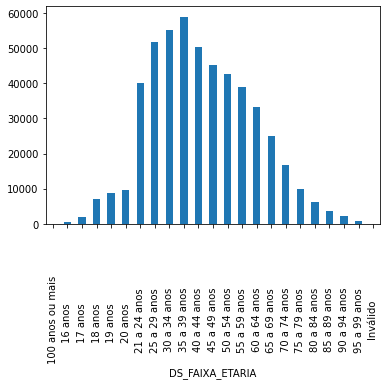

In [13]:
cidade.groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum().plot(kind='bar')

#### Plot Quantidade de eleitores inscritos com nome social

<AxesSubplot:xlabel='QT_ELEITORES_INC_NM_SOCIAL'>

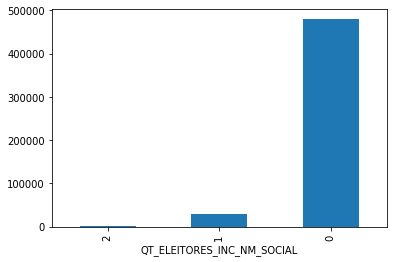

In [12]:
cidade.groupby('QT_ELEITORES_INC_NM_SOCIAL')['QT_ELEITORES_PERFIL'].sum().sort_values().plot(kind='bar')